In [75]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [76]:
# Load data
df = pd.read_csv('../Resources/preprocessed_data.csv')
df.head()

,Date,Store,Dept,Date.1,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,...,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
0,2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,...,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0
1,2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,...,0,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675,0.0
2,2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,...,0,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056,0.0
3,2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,...,0,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0
4,2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,...,0,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0


In [77]:
del df['Date.1']

In [78]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df["Date"] =  df['Date'].apply(lambda x: x.timestamp())
df['Date'].info

<bound method Series.info of 0         1.265328e+09
1         1.265328e+09
2         1.265328e+09
3         1.265328e+09
4         1.265328e+09
              ...     
374242    1.351210e+09
374243    1.351210e+09
374244    1.351210e+09
374245    1.351210e+09
374246    1.351210e+09
Name: Date, Length: 374247, dtype: float64>

In [79]:
df = pd.get_dummies(df, columns=['Type'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374247 entries, 0 to 374246
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            374247 non-null  float64
 1   Store           374247 non-null  int64  
 2   Dept            374247 non-null  int64  
 3   Weekly_Sales    374247 non-null  float64
 4   Size            374247 non-null  int64  
 5   Temperature     374247 non-null  float64
 6   Fuel_Price      374247 non-null  float64
 7   CPI             374247 non-null  float64
 8   Unemployment    374247 non-null  float64
 9   IsHoliday       374247 non-null  int64  
 10  Year            374247 non-null  int64  
 11  Month           374247 non-null  int64  
 12  Week            374247 non-null  int64  
 13  max             374247 non-null  float64
 14  min             374247 non-null  float64
 15  mean            374247 non-null  float64
 16  median          374247 non-null  float64
 17  std       

In [96]:
df['Date'] = df["Date"].astype(int)
df['Weekly_Sales'] = df["Weekly_Sales"].astype(int)
df['Temperature'] = df['Temperature'].astype(int)
df['Fuel_Price'] = df['Fuel_Price'].astype(int)
df['CPI'] = df['CPI'].astype(int)
df['Unemployment'] = df['Unemployment'].astype(int)
df['max'] = df['max'].astype(int)
df['min'] = df['min'].astype(int)
df['mean'] = df['mean'].astype(int)
df['median'] = df['median'].astype(int)
df['std'] = df['std'].astype(int)
df['Total_MarkDown'] = df['Total_MarkDown'].astype(int)


In [97]:
# Define features set
X = df.drop("Weekly_Sales", axis=1)
X.head()

,Date,Store,Dept,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,...,Week,max,min,mean,median,std,Total_MarkDown,Type_A,Type_B,Type_C
0,1265328000,1,1,151315,42,2,211,8,0,2010,...,5,57592,14537,22513,18535,9854,0,True,False,False
1,1265328000,9,97,125833,38,2,214,6,0,2010,...,5,766,-9,372,371,290,0,False,True,False
2,1265328000,9,85,125833,38,2,214,6,0,2010,...,5,2512,110,876,824,307,0,False,True,False
3,1265328000,8,80,155078,34,2,214,6,0,2010,...,5,11990,7414,9188,9161,756,0,True,False,False
4,1265328000,9,55,125833,38,2,214,6,0,2010,...,5,29166,4791,8607,7571,3874,0,False,True,False


In [83]:
#df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
#df['Date'] = df['Date'].astype(float)
# df["Date"] =  df['Date'].apply(lambda x: x.timestamp())
# df

In [98]:
# Define the depended variable. 
y = df['Weekly_Sales'].values

In [99]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [100]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [101]:
# Transform the training and testing data by using the X_scaler model
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.002
k: 3, Train/Test Score: 0.300/0.003
k: 5, Train/Test Score: 0.155/0.003
k: 7, Train/Test Score: 0.100/0.003
k: 9, Train/Test Score: 0.073/0.003
k: 11, Train/Test Score: 0.058/0.003
k: 13, Train/Test Score: 0.048/0.003
k: 15, Train/Test Score: 0.041/0.003
k: 17, Train/Test Score: 0.036/0.003
k: 19, Train/Test Score: 0.033/0.003


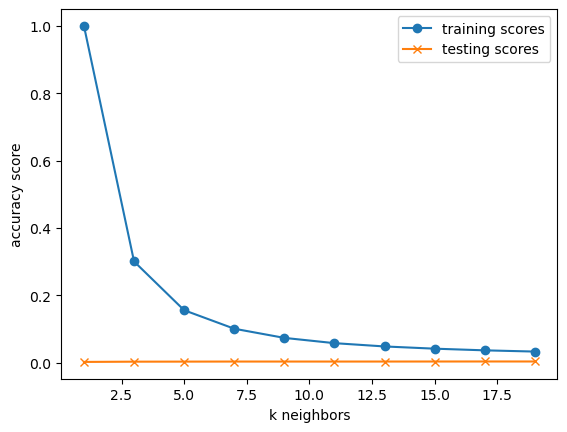

In [102]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [103]:
# Train the KNN model with the best k value
# Note that k: 9 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.003
